Thetrain sequence models on the `Cafe Chatbot Data`.

Before starting copy this file and work on your own copy by following the below steps: <br>
`File > Save Copy in Drive`. Then add your name to the file (e.g., Assignment 07: Sequence Modeling - Zahraa Dhafer).

**DATASET**
This dataset consists of three csv files, you'll be working on the conversationo CSV file which contains two columns of questions and answers.<br><br>
**Submission Deadline: Saturday, 3/12/2022 at 3:00 PM**

**Requirements:**

1. Import all necessary libraries for the sequence modeling project.
2. Download the dataset (the link is provided below).
3. Read data from CSV file.
4. Prepare the data:
*   Clean the sentences by removing special characters.
*   Add a start and end token to each sentence.
*   Tokenize the sentences.
*   Pad each sentence to a maximum length.
<br>
5. Create the Data Pipeline for the Model
6. Create the Seq2Seq Model Architecture.<br>
**Note**: Use Adam optimizer and the appropriate loss function.
7. Create the Optimizer and the Loss Function.
8. Create the Training Step.
9. Create the Training Loop




[Dataset](https://www.kaggle.com/sonalibhoir/cafe-chatbot-dataset?select=conversationo.csv)


## 1- Import all necessary libraries for the sequence modeling project

In [1]:
#import libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import re
from sklearn import model_selection
import matplotlib.pyplot as plt

## 2- Download the dataset

In [2]:
# download the required dataset from kaggle 
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d sonalibhoir/cafe-chatbot-dataset

  0% 0.00/7.55k [00:00<?, ?B/s]
100% 7.55k/7.55k [00:00<00:00, 5.05MB/s]


In [4]:
!unzip /content/cafe-chatbot-dataset.zip

Archive:  /content/cafe-chatbot-dataset.zip
  inflating: Item_to_id.csv          
  inflating: conversationo.csv       
  inflating: food.csv                


## 3- Read data from CSV file

In [55]:
#read data from csv file
data=pd.read_csv('/content/conversationo.csv')

In [56]:

#show the data
data

,Question,answer
0,hey,Hello! How may I help you.
1,do u have coffee,"Yes sir Simple Coffee ,Cappuchino, Americano,..."
2,i will take one espresso and 5 americano,Sir thanks for your order. You have ordered 1 ...
3,anything special,"We have coffe,pastries,puff pastries and milks..."
4,suggest something,"We have coffe,pastries,puff pastries and milks..."
...,...,...
974,what is price of French Coffee,"Its our one of best, you can enjoy it at just ..."
975,what is price of Iced Coffee Late,"Its our one of best, you can enjoy it at just ..."
976,what is price of Latte Macchiato,"Its our one of best, you can enjoy it at just ..."
977,what is price of Wainans Choco Coffee,"Its our one of best, you can enjoy it at just ..."


In [57]:
#information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  961 non-null    object
 1   answer    939 non-null    object
dtypes: object(2)
memory usage: 15.4+ KB


In [58]:
data.isnull().sum()

Question    18
answer      40
dtype: int64

In [59]:
#drop missing value
data.dropna(inplace=True)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 937 entries, 0 to 978
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  937 non-null    object
 1   answer    937 non-null    object
dtypes: object(2)
memory usage: 22.0+ KB


In [61]:
data.isnull().sum()

Question    0
answer      0
dtype: int64

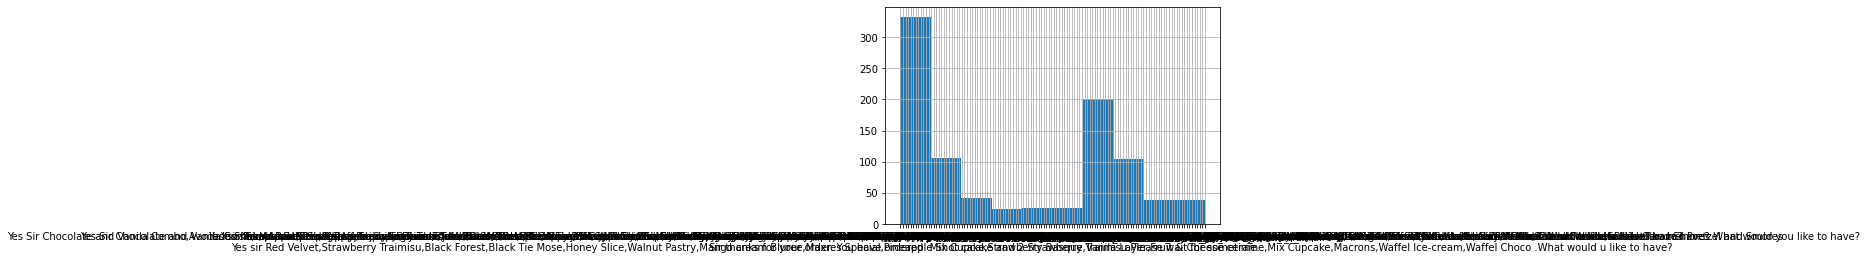

In [62]:
#plot
data['answer'].hist()

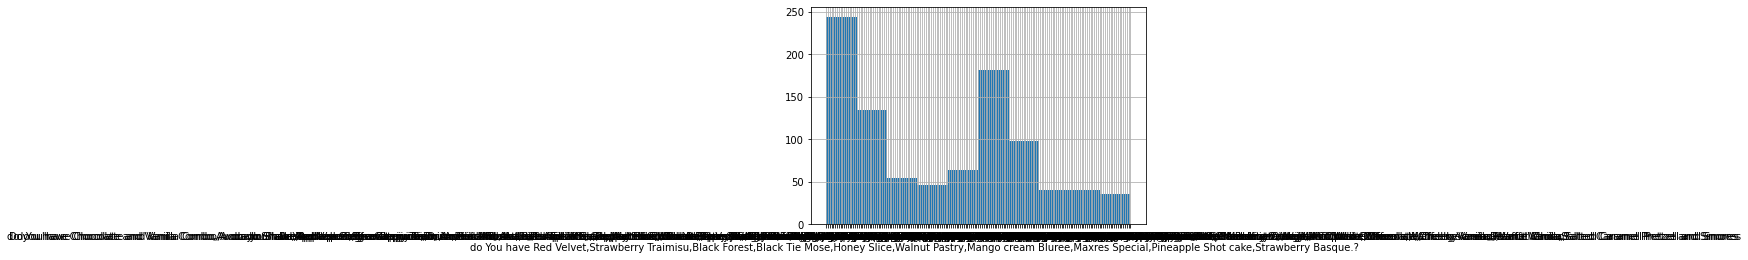

In [63]:
data['Question'].hist()

##4- Prepare the data:


### Clean the sentences by removing special characters

In [64]:


def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub(r'[^\w]',' ',text)
    text = re.sub('\w*\d\w*', '', text)
    text = " ".join(filter(lambda x:x[0]!="@", text.split()))
    return text
data.Question=data.Question.map(clean_text)
data.answer =data.answer.map(clean_text)



In [65]:
data.Question[0],data.answer[0]

('hey', 'hello how may i help you')

In [66]:
#add start and end 
def add_start_end(sentence):
  sentence= f'<start> {sentence} <end>'
  return sentence

data.answer=data.answer.map(add_start_end) 
data.Question=data.Question.map(add_start_end) 

In [67]:
#show the data
data

,Question,answer
0,<start> hey <end>,<start> hello how may i help you <end>
1,<start> do u have coffee <end>,<start> yes sir simple coffee cappuchino ameri...
2,<start> i will take one espresso and americano...,<start> sir thanks for your order you have ord...
3,<start> anything special <end>,<start> we have coffe pastries puff pastries a...
4,<start> suggest something <end>,<start> we have coffe pastries puff pastries a...
...,...,...
974,<start> what is price of french coffee <end>,<start> its our one of best you can enjoy it a...
975,<start> what is price of iced coffee late <end>,<start> its our one of best you can enjoy it a...
976,<start> what is price of latte macchiato <end>,<start> its our one of best you can enjoy it a...
977,<start> what is price of wainans choco coffee ...,<start> its our one of best you can enjoy it a...


In [68]:
data.head(3)

,Question,answer
0,<start> hey <end>,<start> hello how may i help you <end>
1,<start> do u have coffee <end>,<start> yes sir simple coffee cappuchino ameri...
2,<start> i will take one espresso and americano...,<start> sir thanks for your order you have ord...


### Add a start and end token to each sentence

### Tokenize the sentences

In [69]:
def tokenize(lang):
  # create a tokenizer object
  lang_tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token='<OOV>',
      filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n')
  lang_tokenizer.fit_on_texts(lang)
  tensor = lang_tokenizer.texts_to_sequences(lang)
  tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

  return tensor, lang_tokenizer


question_sequence,question_tokenizer = tokenize(data.Question)
answer_sequence,answer_tokenizer = tokenize(data.answer)

In [70]:
question_tokenizer

In [71]:
vocab_inp_size = len(question_tokenizer.word_index)+1
vocab_tar_size =  len(answer_tokenizer.word_index)+1
embedding_dim =64
units = 512
batch_size=32

In [72]:
question_tokenizer.word_index

{'<OOV>': 1,
 '<end>': 3,
 '<start>': 2,
 'a': 56,
 'americano': 13,
 'and': 21,
 'anything': 88,
 'apple': 83,
 'asparagus': 126,
 'at': 164,
 'au': 39,
 'avocado': 44,
 'bad': 141,
 'banana': 47,
 'basque': 105,
 'beef': 144,
 'black': 31,
 'blaeter': 127,
 'blueberry': 79,
 'bluree': 103,
 'book': 120,
 'caffe': 158,
 'cake': 115,
 'can': 37,
 'candy': 50,
 'cappucchino': 66,
 'cappuchino': 89,
 'caramel': 52,
 'cerame': 86,
 'chans': 81,
 'char': 142,
 'cheery': 60,
 'cheese': 55,
 'cherry': 107,
 'choco': 46,
 'chocolate': 28,
 'cinnimon': 121,
 'coffee': 20,
 'combo': 43,
 'con': 90,
 'cotton': 49,
 'cranberry': 74,
 'cream': 29,
 'cupcake': 62,
 'dirty': 137,
 'do': 6,
 'drumstick': 68,
 'easy': 123,
 'egg': 30,
 'else': 140,
 'espresso': 26,
 'excuse': 153,
 'extra': 150,
 'for': 162,
 'forest': 97,
 'frappe': 92,
 'french': 57,
 'fruit': 36,
 'get': 87,
 'give': 133,
 'good': 138,
 'h': 58,
 'have': 5,
 'hello': 35,
 'hey': 38,
 'honey': 63,
 'i': 16,
 'ice': 65,
 'iced': 93,


In [73]:
answer_tokenizer.word_index

{'<OOV>': 1,
 '<end>': 3,
 '<start>': 2,
 'a': 60,
 'affair': 199,
 'affaire': 140,
 'americano': 66,
 'and': 25,
 'answer': 200,
 'apple': 83,
 'are': 145,
 'asparagus': 152,
 'at': 18,
 'au': 58,
 'avocado': 68,
 'banana': 74,
 'basque': 129,
 'beef': 164,
 'best': 16,
 'bikini': 194,
 'black': 57,
 'blaeter': 153,
 'blueberry': 149,
 'bluree': 111,
 'book': 169,
 'but': 157,
 'cafe': 43,
 'caffe': 176,
 'cake': 128,
 'can': 11,
 'candy': 77,
 'cappccino': 116,
 'cappucchino': 117,
 'cappuchino': 103,
 'caramel': 70,
 'cerame': 113,
 'chans': 118,
 'char': 160,
 'cheery': 89,
 'cheese': 93,
 'cherry': 139,
 'choco': 71,
 'chocolate': 35,
 'choice': 45,
 'cindy': 197,
 'cinnimon': 150,
 'click': 171,
 'coffe': 120,
 'coffee': 37,
 'combo': 67,
 'con': 141,
 'cotton': 76,
 'cranberry': 88,
 'crawford': 198,
 'cream': 39,
 'cupcake': 94,
 'do': 168,
 'drumstick': 86,
 'easy': 162,
 'egg': 132,
 'enjoy': 17,
 'espresso': 55,
 'filter': 147,
 'for': 30,
 'forest': 121,
 'frappe': 135,
 'f

In [74]:
#split the datasets into training and testing
x_train,x_test,y_train,y_test = model_selection.train_test_split(question_sequence,answer_sequence,test_size=0.2)

In [75]:
#shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(749, 49)
(188, 49)
(749, 54)
(188, 54)


In [76]:

def convert(token, tensor):
  for t in tensor:
    if t!=0:
      print ("%d ----> %s" % (t, token.index_word[t]))

print ("question ; index to word mapping")
convert(question_tokenizer, x_train[0])
print ()
print ("answar; index to word mapping")
convert(answer_tokenizer, y_train[0])      

question ; index to word mapping
2 ----> <start>
18 ----> suggest
17 ----> me
15 ----> something
3 ----> <end>

answar; index to word mapping
2 ----> <start>
22 ----> i
23 ----> may
34 ----> suggest
4 ----> you
115 ----> nutella
28 ----> puff
3 ----> <end>


363


(array([479., 324.,  66.,   4.,   0.,   0.,   8.,  22.,   6.,  28.]),
 array([ 20. ,  54.3,  88.6, 122.9, 157.2, 191.5, 225.8, 260.1, 294.4,
        328.7, 363. ]),
 <a list of 10 Patch objects>)

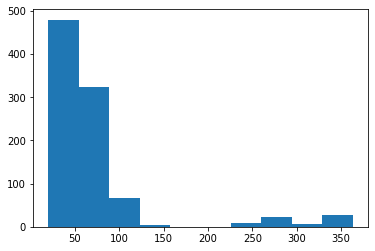

In [77]:
list_seq=[]
seq_lenght=[len(list_seq) for list_seq in data.answer]
print(max(seq_lenght))
plt.hist(seq_lenght)

339


(array([827.,  70.,   8.,   4.,   0.,   4.,   8.,   4.,   0.,  12.]),
 array([ 17. ,  49.2,  81.4, 113.6, 145.8, 178. , 210.2, 242.4, 274.6,
        306.8, 339. ]),
 <a list of 10 Patch objects>)

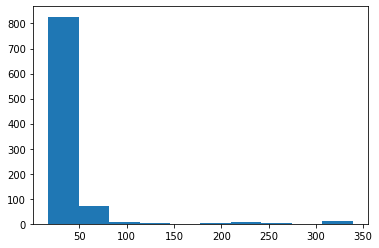

In [78]:


list_seq=[]
seq_lenght=[len(list_seq) for list_seq in data.Question]
print(max(seq_lenght))
plt.hist(seq_lenght)

### Pad each sentence to a maximum length

## 5- Create the Data Pipeline for the Model

In [79]:

def create_data_pipline(x,y):
    data =tf.data.Dataset.from_tensor_slices((x,y))
    data =data.shuffle(400)
    data=data.batch(batch_size=32,drop_remainder=True)
    data =data.prefetch(tf.data.AUTOTUNE)
    return data
# create the training data
train_dataset = create_data_pipline(x_train,y_train)
# create the testing data
test_dataset = create_data_pipline(x_test,y_test)

In [80]:
# get the first batch of the training data 
for question, answer in train_dataset.take(1):
  print(f"question:{question.shape}\n{question}")
  print(f"answer:{answer.shape}\n{answer}")
  question_sample = question
  answer_sample = answer

question:(32, 49)
[[ 2 38  3 ...  0  0  0]
 [ 2 18 17 ...  0  0  0]
 [ 2  4  7 ...  0  0  0]
 ...
 [ 2  6 11 ...  0  0  0]
 [ 2  6 11 ... 21 78  3]
 [ 2  4  7 ...  0  0  0]]
answer:(32, 54)
[[  2  47  48 ...   0   0   0]
 [  2  22  23 ...   0   0   0]
 [  2  10   7 ...   0   0   0]
 ...
 [  2 156  24 ...   0   0   0]
 [  2  27  36 ...   0   0   0]
 [  2  10   7 ...   0   0   0]]


##6- Create the Seq2Seq Model Architecture

###Encoder Model

In [81]:
# Create the encoder model
class Encoder(tf.keras.Model):
  
  def __init__(self, vocab_size, embedding_dim, encoder_units, batch_size):
    super(Encoder, self).__init__()
    self.batch_size = batch_size
    self.encoder_units = encoder_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.encoder_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer=tf.keras.initializers.glorot_normal(seed=42))

  def call(self, x, hidden):
    x = self.embedding(x)
    output, state = self.gru(x, initial_state = hidden)
    return output, state

  def initialize_hidden_state(self):
    return tf.zeros((self.batch_size, self.encoder_units))



In [82]:
# Create the decoder model
class Decoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, decoder_units, batch_size):
    super(Decoder, self).__init__()
    self.batch_size = batch_size
    self.decoder_units = decoder_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.decoder_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')

    self.fc = tf.keras.layers.Dense(vocab_size)

   
  def call(self, x, hidden):
    x = self.embedding(x)
    output, hidden = self.gru(x,hidden)
    output = tf.reshape(output, (-1, output.shape[2]))
    x = tf.nn.softmax(self.fc(output))
    return x, hidden

In [83]:
encoder = Encoder(vocab_inp_size, embedding_dim, units, batch_size)
sample_hidden = encoder.initialize_hidden_state()
sample_output, sample_hidden = encoder(question, sample_hidden)
print ('(batch size, sequence length, units)',(sample_output.shape))
print ('(batch size, units)',(sample_hidden.shape))

(batch size, sequence length, units) (32, 49, 512)
(batch size, units) (32, 512)


In [84]:

decoder = Decoder(vocab_tar_size, embedding_dim, units, batch_size) 
sample_decoder_output, _ = decoder(tf.random.uniform((batch_size, 1)),
                                      sample_hidden)

print ('(batch_size, vocab size) ',sample_decoder_output.shape)

(batch_size, vocab size)  (32, 201)


### Decoder Model

## 7- Create the Optimizer and the Loss Function

In [85]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False, reduction='none')
# create the loss function
def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  # calculate the loss
  loss_ = loss_object(real, pred)
  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask
  return tf.reduce_mean(loss_)

In [89]:
# create the training metric 
train_loss = tf.metrics.Mean(name='train loss')
# create the testing metric 
test_loss =tf.metrics.Mean(name='test loss')

## 8- Create the Training Loop

In [92]:
@tf.function
# define the training step 
def train_step(inputs, target, enc_hidden):
  loss = 0

  with tf.GradientTape() as tape:
    enc_output, enc_hidden = encoder(inputs, enc_hidden)
    dec_hidden = enc_hidden
    dec_input = tf.expand_dims([answer_tokenizer.word_index['<start>']] * inputs.shape[0], 1)
    
    
    for t in range(1, target.shape[1]):
      predictions, dec_hidden = decoder(dec_input, dec_hidden)

      loss += loss_function(target[:, t], predictions)

      # using teacher forcing
      dec_input = tf.expand_dims(target[:, t], 1)
  batch_loss = (loss / int(target.shape[1]))

  variables = encoder.trainable_variables + decoder.trainable_variables
  gradients = tape.gradient(loss, variables)
  optimizer.apply_gradients(zip(gradients, variables))
  train_loss(batch_loss)
  return batch_loss


In [93]:
@tf.function 
def test_step(inputs, target, enc_hidden):
    # inilaize the loss to zero
    loss = 0
    enc_output, enc_hidden = encoder(inputs, enc_hidden)
    dec_hidden = enc_hidden
    dec_input = tf.expand_dims([answer_tokenizer.word_index['<start>']] * inputs.shape[0], 1)
    for t in range(1, target.shape[1]):
        predictions, dec_hidden = decoder(dec_input, dec_hidden)
        loss += loss_function(target[:, t], predictions)

        # using teacher forcing
        dec_input = tf.expand_dims(target[:, t], 1)
    batch_loss = (loss / int(target.shape[1]))
    test_loss(batch_loss)



In [94]:
train_loss

##9- Create the Training Step

In [95]:
EPOCHS = 10

# create the training loop
for epoch in range(EPOCHS):
    # reset the training loss metric
    train_loss.reset_states()
    # reset the testing loss metric
    test_loss.reset_states()


    enc_hidden = encoder.initialize_hidden_state()
    
    steps_per_epoch = answer_sequence.shape[0]//batch_size 
    bar = tf.keras.utils.Progbar(target=steps_per_epoch)
    
    count=0
    for (batch, (inputs, target)) in enumerate(train_dataset):
        count += 1
        # run the training step
        batch_loss = train_step(inputs, target, enc_hidden)
        bar.update(count) 
                                                  
    
         
    
    # iterate over the testing dataset    
    for (batch, (inputs, target)) in enumerate(test_dataset):
        count += 1
        batch_loss = test_step(inputs, target, enc_hidden)
        bar.update(count)

    # print the training and testing loss
    print('#' * 50)
    print(f'Epoch #{epoch + 1}')
    print(f'Training Loss {train_loss.result()}')
    print(f'Testing Loss {test_loss.result()}')
    print('#' * 50)

28/29 [===========================>..] - ETA: 0s##################################################
Epoch #1
Training Loss 1.0027083158493042
Testing Loss 0.7099976539611816
##################################################
28/29 [===========================>..] - ETA: 0s##################################################
Epoch #2
Training Loss 0.7606614828109741
Testing Loss 0.5690580010414124
##################################################
28/29 [===========================>..] - ETA: 0s##################################################
Epoch #3
Training Loss 0.60235595703125
Testing Loss 0.46321526169776917
##################################################
28/29 [===========================>..] - ETA: 0s##################################################
Epoch #4
Training Loss 0.4715549945831299
Testing Loss 0.3522721230983734
##################################################
28/29 [===========================>..] - ETA: 0s##################################################
Epoch 